In [ ]:
"""
CNN(Convolutional nueral network,합성곱):
이미지에서 특징들을 추출해서 특징값을 input으로 하자!

숫자의 사진이 회전이 되더라도 특징은 그대로이기 때문에 특징으로 하는 것 중요

ex:          1단계특징                     2단계특징    3단계:분류
[고양이사진] -> [동그라미,세모,부드러움,가로] -> 눈코입귀 등 -(조합)-> [고양이]

"""

In [ ]:
*위 단계 예:
사진-> CNN{ [Convolutional Layer] -특징추출-> Neural Network} -(softmax)-> 고양:x%,개:y%       

In [ ]:
*정리:Convolutional Layer란? 입력데이터로부터 특징을 추출하는 역할을 수행하는 계층
    -필터: 특징을 추출하는 기능
    -활성화 함수(Relu): 필터가 추출한 값을 비선형 값으로 변경해주는 함수
*[Convolutional Layer]:[filter1 -> Relu
                        filter2 -> Relu
                        filter3 -> Relu]

In [ ]:
*입력:
    [사진](64*64) => [Convolution Layer](64*64*10) =>
    (있을수도 없을 수도)[Pooling Layer]:크기가 줄어듬(ex: 32*32*x)
        =>[Convolution Layer2](32*32*x)

In [ ]:
*Pooling Layer:특징의 대표값을 추출하기 때문에 압축의 효과를 누린다,연산량도 줄어듬
    기본형태는 Conv -> Pooling -> Conv : 번갈아가면서 이지만 설계하기, 나름 다를수도 있음,
    Pooling할 때 stride(보폭)도 정해줄 수 있고 크기도 정해줄 수 있음,보통 input_data의 크기의
    약수로 정해주는 경우가 많지만 꼭 그렇지 않아도 됨

In [ ]:
*Pooling Layer(16*16)=(Flatening)=>[0,                       [0,  ->x%
                                    1,                        1,  ->y%
                                    ...   -Neural Network->  ...          =>출력:n
                                    255]                     ,9]  ->z%
장점:
    1. 크기 감소, 속도 사응
    2. 영역 대표적 특징
    3. 위치나 각도 등의 변화에 대해 잘 적응하도록 수행하는 작업(여러방향에서 봐도 모델이 잘 작동)
종류:
    주로 많이쓰는건 Max pooling(그 영역을 대표하는 값을 압축해서 뽑겠다는 의미)
    그외 mean pooling 등 있음

In [ ]:
*filter: 어떤 특징이 해당 데이터에 있는지 확인하는 것(ex: 3*3에 있는지)
    ex:
        [물고기 사진] -filter: 특징1[(0,0,1,1,0,0)과같은] ->
        [물고기 사진]의 일부 matrix와 합성곱을 함(특징이 있는 부분은 값이 커지게 됨) ->
        sliding window: filter 크기만큼 한 matrix씩 옮겨가면서 합성곱을함->
            특징이 있는 경우만 더 부각화 됨 p170~ 책 참조
    => filter를 kernel(커널)이라고도 부름

In [ ]:
*padding?

In [ ]:
*이전 모델에선 wx+b,w:weight b:bias,를 썼었음
filter의 값이 w의 역할!, 처음에 filter 값을 random_normal로 주고 update해줌
, bias를 마지막에 추가해서 data 출력

In [ ]:
*입력: (4,4), 
    패딩:1, 스트라이드: 1, filter(3,3)=>
출력?
    H=(4+2*1-3)/1 +1 = 4 (2는 2*패딩,4는 입력의 x)
    w=(4+2*1-3)/1 +1 = 4 (3은 filter의 y)   
입력:(7,7)
    패딩:0, 스트라이드: 2, filter(3,3)=>
    H=(7+2*0-3)/2 +1 = 3
    w=(7+2*0-3)/2 +1 = 3

In [ ]:
*3차원데이터의 합성곱?(RGB)
3차원 데이터에 합성곱이므로 filter도 3차원이어야함

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
image=np.array([[[[1],[2],[3]],
          [[4],[5],[6]],
         [[7],[8],[9]]]],dtype=np.float32)

In [4]:
image.shape

(1, 3, 3, 1)

TypeError: Invalid shape (1, 3, 3, 1) for image data

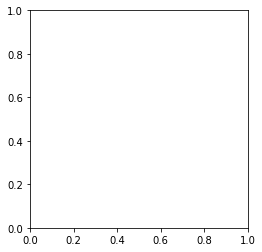

In [7]:
plt.imshow(image,cmap='Greys')
#shape error나오는 상태

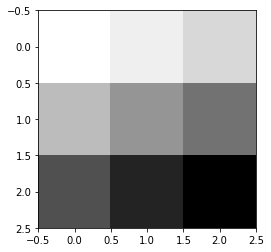

In [8]:
# shape=(100 ,5,4,3) -> 100장의 사진, 마지막3은 RGB 칼라색상
plt.imshow(image.reshape(3,3),cmap='Greys') 

In [13]:
weight=tf.constant([[[[1.]],[[1.]]],
                  [[[1.]],[[1.]]]])
print(weight)

Tensor("Const:0", shape=(2, 2, 1, 1), dtype=float32)


In [14]:
sess=tf.InteractiveSession()

conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID') #<- convolutional 2 demention
#strides의 가운데 2개 몇줄만큼 이동하냐 의 변수, 2번째가 좌우, 3번째가 위아래
conv2dimage=conv2d.eval() #<- 합성곱 연산

In [17]:
conv2dimage.shape
conv2dimage

array([[[[12.],
         [16.]],

        [[24.],
         [28.]]]], dtype=float32)

[[12. 16.]
 [24. 28.]]


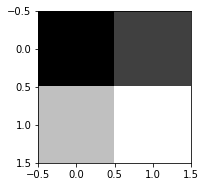

In [21]:
for i , img in enumerate(conv2dimage):
    print(img.reshape(2,2))
    plt.subplot(1,2,i+1)
    plt.imshow(img.reshape(2,2),cmap='gray') #<- filter를 적용한 그림

In [22]:
conv2d = tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='SAME')
conv2dimage=conv2d.eval() #<-padding을 same으로 주어서 원래 크기를 유지

In [23]:
conv2dimage.shape

(1, 3, 3, 1)

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


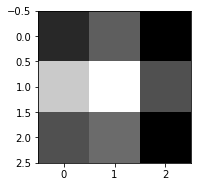

In [24]:
for i , img in enumerate(conv2dimage):
    print(img.reshape(3,3))
    plt.subplot(1,2,i+1)
    plt.imshow(img.reshape(3,3),cmap='gray') 

In [25]:
#mnist 데이터 -> CNN 모델
import random
from tensorflow.examples.tutorials.mnist import input_data

In [56]:
tf.reset_default_graph()

In [57]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [58]:
#하이퍼 퍼러미터: 모델의 성능에 변화를 주는 변수들
lr=0.001
epochs=15
batch_size=100

In [59]:
#입력층
keep_prob=tf.placeholder(tf.float32) #<- 새로 추가됨
x = tf.placeholder(tf.float32,[None,28*28])
ximg = tf.reshape(x,[-1,28,28,1]) #<- -1의 의미는 None, tensorflow에선 None이라고 함,
#-1도 None과 같은 의미로 쓰이는데 numpy에서 그렇게쓰임. 결과적으론 같은의미가 됨
#2차원 구조를 4차원구조로 바꾸어줌
y = tf.placeholder(tf.float32,[None,10])

In [60]:

x = tf.placeholder(tf.float32,[None,28*28])
ximg = tf.reshape(x,[-1,28,28,1]) #<- -1의 의미는 None, tensorflow에선 None이라고 함,
#-1도 None과 같은 의미로 쓰이는데 numpy에서 그렇게쓰임. 결과적으론 같은의미가 됨
#2차원 구조를 4차원구조로 바꾸어줌
y = tf.placeholder(tf.float32,[None,10])

#Hidden layer1: weight1=filter
w1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01)) #<-RBB channel이 아니기 때문에 1
# (3,3)은 높이와 너비, 1은 채널의 개수, 32는 filter의 개수: 32개의 특징을 찾겠다
#conv -> (?,28,28,32)
# relu -> (?,28,28,32)
#pool ->  (?,14,14,32)
l1 = tf.nn.conv2d(ximg,w1,strides=[1,1,1,1],padding='SAME')
l1 = tf.nn.relu(l1)
l1=tf.nn.max_pool(l1,
               ksize=[1,2,2,1],
               strides=[1,2,2,1],padding='SAME') #<-(2,2): window의 크기가 (2,2)

In [61]:

x = tf.placeholder(tf.float32,[None,28*28])
ximg = tf.reshape(x,[-1,28,28,1]) #<- -1의 의미는 None, tensorflow에선 None이라고 함,
#-1도 None과 같은 의미로 쓰이는데 numpy에서 그렇게쓰임. 결과적으론 같은의미가 됨
#2차원 구조를 4차원구조로 바꾸어줌
y = tf.placeholder(tf.float32,[None,10])

#Hidden layer1: weight1=filter
w1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01)) #<-RBB channel이 아니기 때문에 1
# (3,3)은 높이와 너비, 1은 채널의 개수, 32는 filter의 개수: 32개의 특징을 찾겠다
#conv -> (?,28,28,32)
# relu -> (?,28,28,32)
#pool ->  (?,14,14,32)
l1 = tf.nn.conv2d(ximg,w1,strides=[1,1,1,1],padding='SAME')
l1 = tf.nn.relu(l1)
l1=tf.nn.max_pool(l1,
               ksize=[1,2,2,1],
               strides=[1,2,2,1],padding='SAME') #<-(2,2): window의 크기가 (2,2)

w2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))
#conv -> (?,14,14,64)
#relu -> (?,14,14,32)
#pool ->  (?,7,7,32)
#flat ->  (?,3136)
l2= tf.nn.conv2d(l1,w2,strides=[1,1,1,1],padding='SAME')
l2 = tf.nn.relu(l2)
l2 = tf.nn.max_pool(l2,
               ksize=[1,2,2,1],
               strides=[1,2,2,1],padding='SAME') #<-(2,2): window의 크기가 (2,2)
l2_flat = tf.reshape(l2,[-1,7*7*64]) #<- flatten함수도 있지만 reshape으로 해도 됨

#마지막계층 FC 7*7*64 -> 10 output
w3 = tf.get_variable("w3",shape=[7*7*64,10],
                     initializer=tf.contrib.layers.xavier_initializer())
#이 과정 그림으로 꼭 그려보기
b=tf.Variable(tf.random_normal([10]))
hf=tf.matmul(l2_flat,w3)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))
opt=tf.train.AdamOptimizer(lr).minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    avgCost = 0
    totalBatch = int(mnist.train.num_examples/batch_size)
    for i in range(totalBatch): #<-한번 돌 때 마다 1 epoch수행됨
        batchX,batchY = mnist.train.next_batch(batch_size) #<-batch_size만큼 data를 가져옴
        fd={x:batchX,y:batchY}
        cv,_=sess.run([cost,opt],feed_dict=fd)
        avgCost+=cv/totalBatch
    print("epoch:","%04d" %(epoch+1),"cost","{:.5f}".format(avgCost))
pred=tf.equal(tf.argmax(hf,1),tf.argmax(y,1))
acc=tf.reduce_mean(tf.cast(pred,tf.float32))
print("accuracy:",sess.run(acc,
                           feed_dict={x:mnist.test.images,y:mnist.test.labels}))

epoch: 0001 cost 0.38254
epoch: 0002 cost 0.10074
epoch: 0003 cost 0.07071
epoch: 0004 cost 0.05589
epoch: 0005 cost 0.04723
epoch: 0006 cost 0.03914
epoch: 0007 cost 0.03415
epoch: 0008 cost 0.03003
epoch: 0009 cost 0.02592
epoch: 0010 cost 0.02378
epoch: 0011 cost 0.02046
epoch: 0012 cost 0.01857
epoch: 0013 cost 0.01623
epoch: 0014 cost 0.01455
epoch: 0015 cost 0.01308
accuracy: 0.9884


In [63]:
tf.reset_default_graph()

In [64]:

x = tf.placeholder(tf.float32,[None,28*28])
ximg = tf.reshape(x,[-1,28,28,1]) #<- -1의 의미는 None, tensorflow에선 None이라고 함,

y = tf.placeholder(tf.float32,[None,10])

#Hidden layer1: weight1=filter
w1 = tf.Variable(tf.random_normal([3,3,1,32],stddev=0.01)) #<-RBB channel이 아니기 때문에 1

l1 = tf.nn.conv2d(ximg,w1,strides=[1,1,1,1],padding='SAME')
l1 = tf.nn.relu(l1)
l1=tf.nn.max_pool(l1,
               ksize=[1,2,2,1],
               strides=[1,2,2,1],padding='SAME') #<-(2,2): window의 크기가 (2,2)
l1 = tf.nn.dropout(l1,keep_prob=keep_prob)

w2 = tf.Variable(tf.random_normal([3,3,32,64],stddev=0.01))

l2= tf.nn.conv2d(l1,w2,strides=[1,1,1,1],padding='SAME')
l2 = tf.nn.relu(l2)
l2 = tf.nn.max_pool(l2,
               ksize=[1,2,2,1],
               strides=[1,2,2,1],padding='SAME') #<-(2,2): window의 크기가 (2,2)
l2 = tf.nn.dropout(l2,keep_prob=keep_prob)
l2_flat = tf.reshape(l2,[-1,7*7*64]) #<- flatten함수도 있지만 reshape으로 해도 됨

w3 = tf.get_variable("w3",shape=[7*7*64,10],
                     initializer=tf.contrib.layers.xavier_initializer())

b=tf.Variable(tf.random_normal([10]))
hf=tf.matmul(l2_flat,w3)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hf, labels=y))
opt=tf.train.AdamOptimizer(lr).minimize(cost)

sess=tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(epochs):
    avgCost = 0
    totalBatch = int(mnist.train.num_examples/batch_size)
    for i in range(totalBatch): #<-한번 돌 때 마다 1 epoch수행됨
        batchX,batchY = mnist.train.next_batch(batch_size) #<-batch_size만큼 data를 가져옴
        fd={x:batchX,y:batchY,keep_prob:0.7}
        cv,_=sess.run([cost,opt],feed_dict=fd)
        avgCost+=cv/totalBatch
    print("epoch:","%04d" %(epoch+1),"cost","{:.5f}".format(avgCost))
pred=tf.equal(tf.argmax(hf,1),tf.argmax(y,1))
acc=tf.reduce_mean(tf.cast(pred,tf.float32))
print("accuracy:",sess.run(acc,
                           feed_dict={x:mnist.test.images,
                                      y:mnist.test.labels,
                                      keep_prob:1}))

ValueError: Tensor("sub_2:0", dtype=float32) must be from the same graph as Tensor("dropout/random_uniform:0", shape=(?, 14, 14, 32), dtype=float32).